In [22]:
import pandas as pd

df_flights = pd.read_csv('/content/drive/MyDrive/github/Flights Data Exploration Challenge/flights.csv')
df_flights.head()


,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


In [23]:
missing_data = df_flights.isnull().sum()
print(missing_data)

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64


In [24]:
import numpy as np

df_flights['DepDel15'] = [1 if np.isnan(delay) and actual_delay >= 15 else 0 for delay, actual_delay in zip(df_flights['DepDel15'], df_flights['DepDelay'])]


In [25]:
missing_data = df_flights.isnull().sum()
print(missing_data)

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64


DepDelay
Minimum: -63.00
Mean: 10.35
Median: -1.00
Maximum: 1425.00



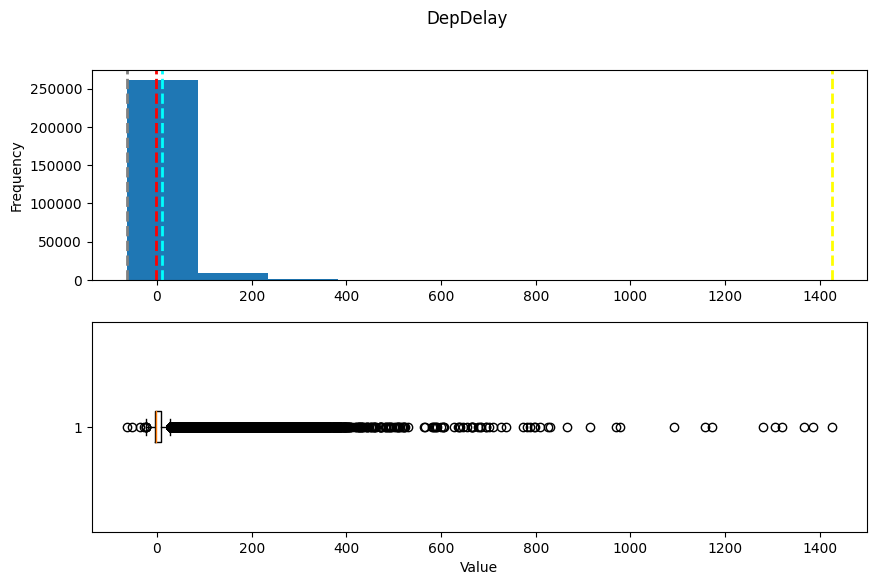

ArrDelay
Minimum: -75.00
Mean: 6.50
Median: -3.00
Maximum: 1440.00



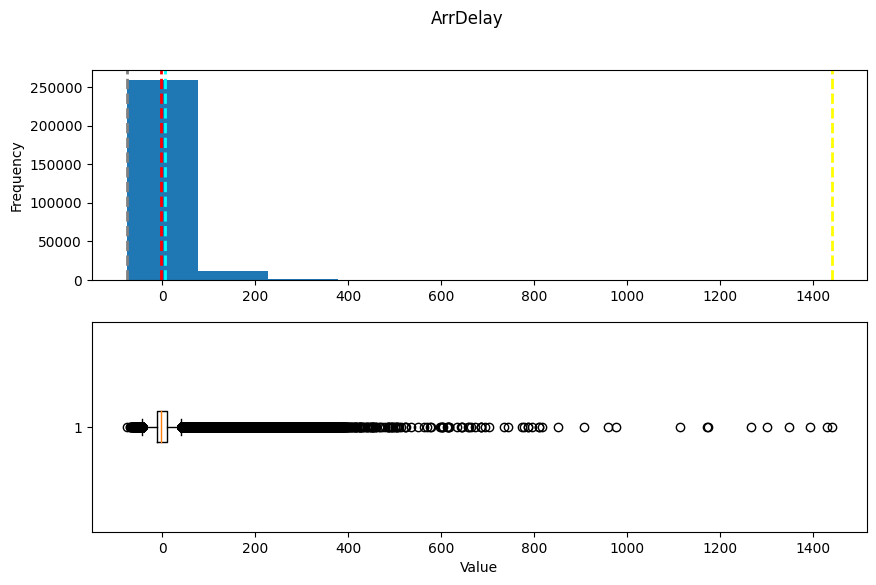

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def show_distribution(var_data):
    # Calculate summary statistics using numpy
    min_val = np.min(var_data)
    max_val = np.max(var_data)
    mean_val = np.mean(var_data)
    med_val = np.median(var_data)


    print(f"{var_data.name}\nMinimum: {min_val:.2f}\nMean: {mean_val:.2f}\nMedian: {med_val:.2f}\nMaximum: {max_val:.2f}\n")

    # Create figure for subplots
    fig, ax = plt.subplots(2, 1, figsize=(10, 6))

    # Plot histogram with lines for statistics
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')
    for val, color in zip([min_val, mean_val, med_val, max_val], ['gray', 'cyan', 'red', 'yellow', 'gray']):
        ax[0].axvline(x=val, color=color, linestyle='dashed', linewidth=2)

    # Plot boxplot
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add title and show figure
    fig.suptitle(var_data.name)
    plt.show()

# Call the function for each delay field
delay_fields = ['DepDelay', 'ArrDelay']
for col in delay_fields:
    show_distribution(df_flights[col])


DepDelay
Minimum: -11.00
Mean: -0.92
Median: -2.00
Maximum: 16.00



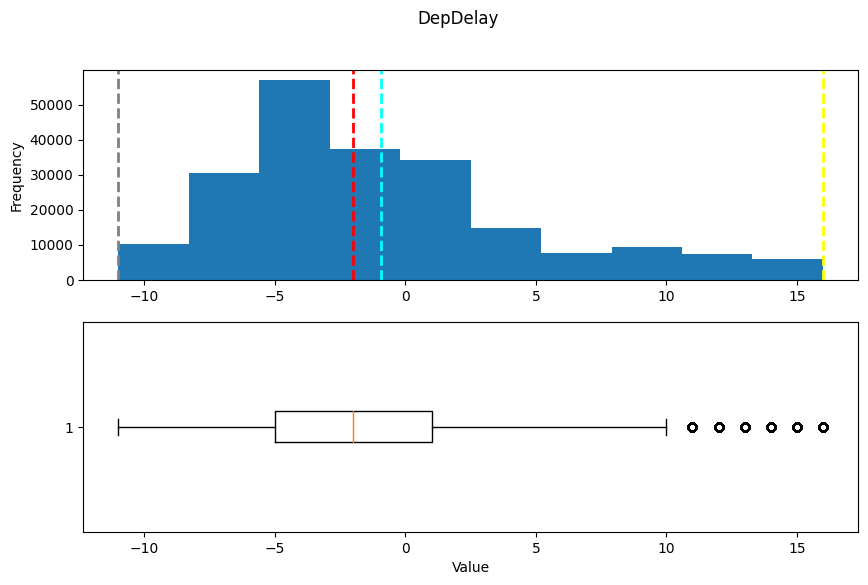

ArrDelay
Minimum: -32.00
Mean: -5.03
Median: -6.00
Maximum: 37.00



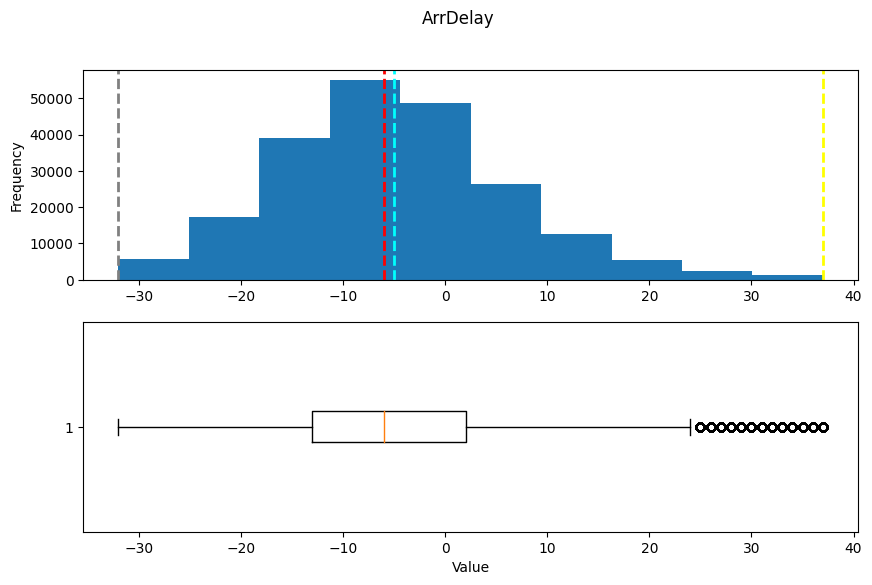

In [44]:
# Trim outliers for ArrDelay based on 1% and 90% percentiles
ArrDelay_01pcntile = df_flights.ArrDelay.quantile(0.01)
ArrDelay_90pcntile = df_flights.ArrDelay.quantile(0.90)
df_flights = df_flights[df_flights.ArrDelay < ArrDelay_90pcntile]
df_flights = df_flights[df_flights.ArrDelay > ArrDelay_01pcntile]

# Trim outliers for DepDelay based on 1% and 90% percentiles
DepDelay_01pcntile = df_flights.DepDelay.quantile(0.01)
DepDelay_90pcntile = df_flights.DepDelay.quantile(0.90)
df_flights = df_flights[df_flights.DepDelay < DepDelay_90pcntile]
df_flights = df_flights[df_flights.DepDelay > DepDelay_01pcntile]

# View the revised distributions
for col in delay_fields:
    show_distribution(df_flights[col])

In [45]:
df_flights[['DepDelay','ArrDelay']].mean()

DepDelay   -0.921692
ArrDelay   -5.030276
dtype: float64

<Axes: title={'center': 'ArrDelay'}, xlabel='Carrier'>

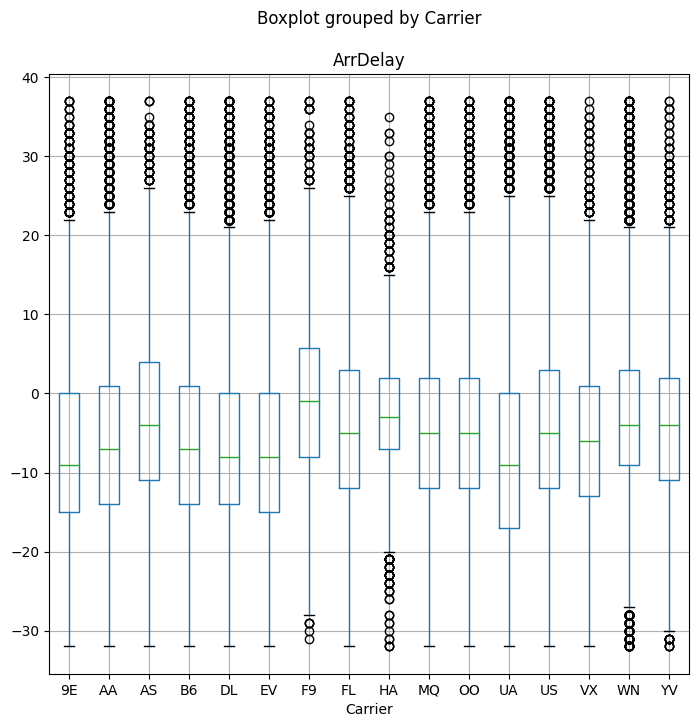

In [46]:
df_flights.boxplot(column='ArrDelay', by='Carrier', figsize=(8,8))

,DepDelay
OriginAirportName,
Chicago Midway International,2.365960
Dallas Love Field,2.148798
William P Hobby,1.561927
Metropolitan Oakland International,0.964853
Denver International,0.807272
...,...
Memphis International,-2.962737
Tucson International,-2.989154
Ted Stevens Anchorage International,-3.149758


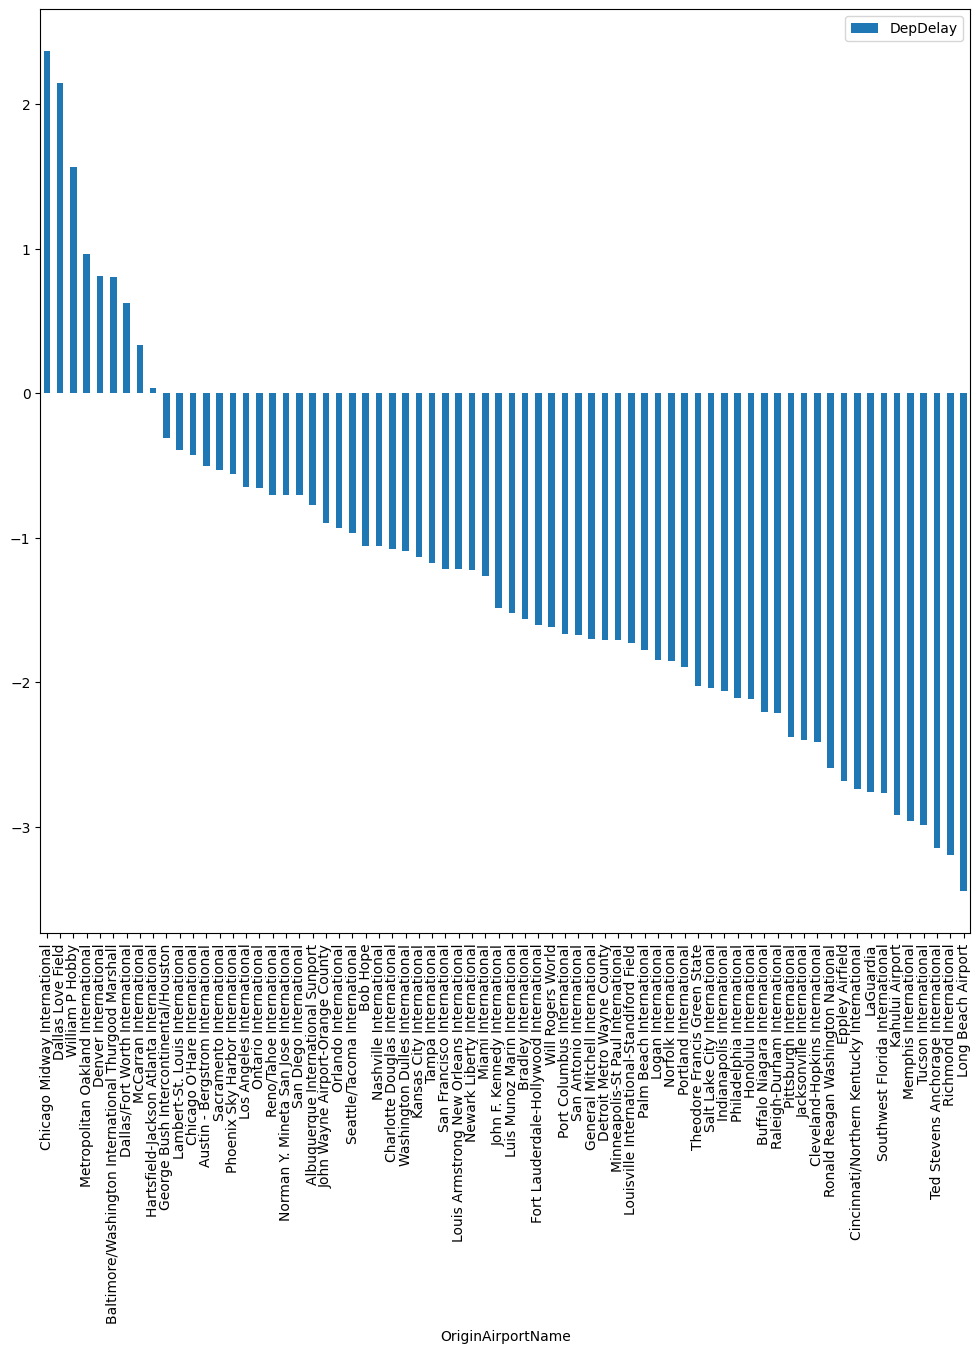

In [47]:
departure_airport_group = df_flights.groupby(df_flights.OriginAirportName)

mean_departure_delays = pd.DataFrame(departure_airport_group['DepDelay'].mean()).sort_values('DepDelay', ascending=False)
mean_departure_delays.plot(kind = "bar", figsize=(12,12))
mean_departure_delays


<Axes: title={'center': 'ArrDelay'}, xlabel='DepDel15'>

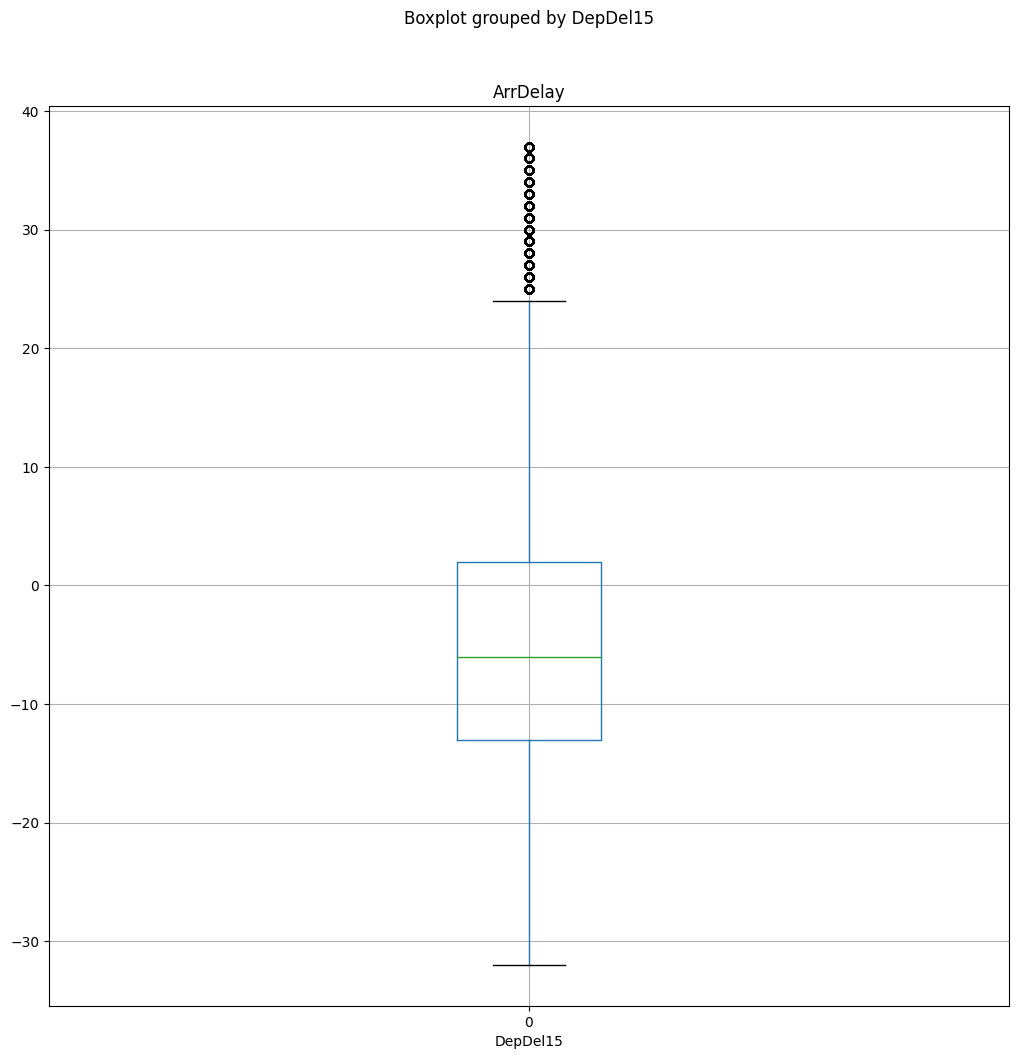

In [48]:
df_flights.boxplot(column='ArrDelay', by='DepDel15', figsize=(12,12))

In [49]:
# Add a routes column
routes  = pd.Series(df_flights['OriginAirportName'] + ' > ' + df_flights['DestAirportName'])
df_flights = pd.concat([df_flights, routes.rename("Route")], axis=1)

# Group by routes
route_group = df_flights.groupby(df_flights.Route)
pd.DataFrame(route_group['ArrDel15'].sum()).sort_values('ArrDel15', ascending=False)

,ArrDel15
Route,
San Francisco International > Los Angeles International,90
Los Angeles International > San Francisco International,69
LaGuardia > Hartsfield-Jackson Atlanta International,68
Los Angeles International > John F. Kennedy International,52
LaGuardia > Charlotte Douglas International,51
...,...
Logan International > Austin - Bergstrom International,0
Logan International > Memphis International,0
Logan International > Port Columbus International,0


In [50]:
pd.DataFrame(route_group['ArrDelay'].mean()).sort_values('ArrDelay', ascending=False)


,ArrDelay
Route,
Louis Armstrong New Orleans International > Ronald Reagan Washington National,24.500000
Cleveland-Hopkins International > Palm Beach International,18.000000
John F. Kennedy International > Louisville International-Standiford Field,18.000000
Cleveland-Hopkins International > Philadelphia International,12.800000
Memphis International > Denver International,9.758621
...,...
Lambert-St. Louis International > Cleveland-Hopkins International,-20.000000
Eppley Airfield > LaGuardia,-20.750000
Denver International > Kahului Airport,-22.666667
